In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
projectsWithBD = 197

In [30]:
#pd.__version__
#pip uninstall pandas

This script analyse this association rules find in the first version

In [2]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv1.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit1_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
#df2 = df.copy()
len(df)
#df.head()
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'PostgreSQL'}),frozenset({'Oracle'}),0.046154,0.038462,0.023077,0.500000,13.000000,0.021302,1.923077,1,1
1,frozenset({'Oracle'}),frozenset({'PostgreSQL'}),0.038462,0.046154,0.023077,0.600000,13.000000,0.021302,2.384615,1,1
2,frozenset({'Oracle'}),frozenset({'HyperSQL'}),0.038462,0.069231,0.023077,0.600000,8.666667,0.020414,2.326923,1,1
3,frozenset({'HyperSQL'}),frozenset({'Oracle'}),0.069231,0.038462,0.023077,0.333333,8.666667,0.020414,1.442308,1,1
4,frozenset({'MySQL'}),frozenset({'PostgreSQL'}),0.120513,0.046154,0.041026,0.340426,7.375887,0.035464,1.446154,1,1
5,frozenset({'PostgreSQL'}),frozenset({'MySQL'}),0.046154,0.120513,0.041026,0.888889,7.375887,0.035464,7.915385,1,1
6,frozenset({'PostgreSQL'}),frozenset({'HyperSQL'}),0.046154,0.069231,0.023077,0.500000,7.222222,0.019882,1.861538,1,1
7,frozenset({'HyperSQL'}),frozenset({'PostgreSQL'}),0.069231,0.046154,0.023077,0.333333,7.222222,0.019882,1.430769,1,1
8,frozenset({'MySQL'}),frozenset({'Oracle'}),0.120513,0.038462,0.030769,0.255319,6.638298,0.026134,1.291209,1,1
9,frozenset({'Oracle'}),frozenset({'MySQL'}),0.038462,0.120513,0.030769,0.800000,6.638298,0.026134,4.397436,1,1


In [3]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [4]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,Oracle,0.046154,0.038462,0.023077,0.500000,13.000000,0.021302,1.923077,1,1
1,Oracle,PostgreSQL,0.038462,0.046154,0.023077,0.600000,13.000000,0.021302,2.384615,1,1
2,Oracle,HyperSQL,0.038462,0.069231,0.023077,0.600000,8.666667,0.020414,2.326923,1,1
3,HyperSQL,Oracle,0.069231,0.038462,0.023077,0.333333,8.666667,0.020414,1.442308,1,1
4,MySQL,PostgreSQL,0.120513,0.046154,0.041026,0.340426,7.375887,0.035464,1.446154,1,1
5,PostgreSQL,MySQL,0.046154,0.120513,0.041026,0.888889,7.375887,0.035464,7.915385,1,1
6,PostgreSQL,HyperSQL,0.046154,0.069231,0.023077,0.500000,7.222222,0.019882,1.861538,1,1
7,HyperSQL,PostgreSQL,0.069231,0.046154,0.023077,0.333333,7.222222,0.019882,1.430769,1,1
8,MySQL,Oracle,0.120513,0.038462,0.030769,0.255319,6.638298,0.026134,1.291209,1,1
9,Oracle,MySQL,0.038462,0.120513,0.030769,0.800000,6.638298,0.026134,4.397436,1,1


In [5]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*projectsWithBD)
df['consequent_sup_abs'] = (df['consequent support']*projectsWithBD)
df['support_abs'] = (df['support']*projectsWithBD)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,Oracle,0.046154,9.092308,0.038462,7.576923,0.023077,4.546154,0.500000,13.000000,0.021302,1.923077,1,1
1,Oracle,PostgreSQL,0.038462,7.576923,0.046154,9.092308,0.023077,4.546154,0.600000,13.000000,0.021302,2.384615,1,1
2,Oracle,HyperSQL,0.038462,7.576923,0.069231,13.638462,0.023077,4.546154,0.600000,8.666667,0.020414,2.326923,1,1
3,HyperSQL,Oracle,0.069231,13.638462,0.038462,7.576923,0.023077,4.546154,0.333333,8.666667,0.020414,1.442308,1,1
4,MySQL,PostgreSQL,0.120513,23.741026,0.046154,9.092308,0.041026,8.082051,0.340426,7.375887,0.035464,1.446154,1,1
5,PostgreSQL,MySQL,0.046154,9.092308,0.120513,23.741026,0.041026,8.082051,0.888889,7.375887,0.035464,7.915385,1,1
6,PostgreSQL,HyperSQL,0.046154,9.092308,0.069231,13.638462,0.023077,4.546154,0.500000,7.222222,0.019882,1.861538,1,1
7,HyperSQL,PostgreSQL,0.069231,13.638462,0.046154,9.092308,0.023077,4.546154,0.333333,7.222222,0.019882,1.430769,1,1
8,MySQL,Oracle,0.120513,23.741026,0.038462,7.576923,0.030769,6.061538,0.255319,6.638298,0.026134,1.291209,1,1
9,Oracle,MySQL,0.038462,7.576923,0.120513,23.741026,0.030769,6.061538,0.800000,6.638298,0.026134,4.397436,1,1


In [6]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,Oracle,0.046154,9.092308,0.038462,7.576923,0.023077,4.546154,0.500000,13.000000,0.021302,1.923077,1,1
1,Oracle,PostgreSQL,0.038462,7.576923,0.046154,9.092308,0.023077,4.546154,0.600000,13.000000,0.021302,2.384615,1,1
2,Oracle,HyperSQL,0.038462,7.576923,0.069231,13.638462,0.023077,4.546154,0.600000,8.666667,0.020414,2.326923,1,1
3,HyperSQL,Oracle,0.069231,13.638462,0.038462,7.576923,0.023077,4.546154,0.333333,8.666667,0.020414,1.442308,1,1
4,MySQL,PostgreSQL,0.120513,23.741026,0.046154,9.092308,0.041026,8.082051,0.340426,7.375887,0.035464,1.446154,1,1
5,PostgreSQL,MySQL,0.046154,9.092308,0.120513,23.741026,0.041026,8.082051,0.888889,7.375887,0.035464,7.915385,1,1
6,PostgreSQL,HyperSQL,0.046154,9.092308,0.069231,13.638462,0.023077,4.546154,0.500000,7.222222,0.019882,1.861538,1,1
7,HyperSQL,PostgreSQL,0.069231,13.638462,0.046154,9.092308,0.023077,4.546154,0.333333,7.222222,0.019882,1.430769,1,1
8,MySQL,Oracle,0.120513,23.741026,0.038462,7.576923,0.030769,6.061538,0.255319,6.638298,0.026134,1.291209,1,1
9,Oracle,MySQL,0.038462,7.576923,0.120513,23.741026,0.030769,6.061538,0.800000,6.638298,0.026134,4.397436,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [7]:
rules1b = df2.sort_values(['support'], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
12,MySQL,HyperSQL,0.120513,23.741026,0.069231,13.638462,0.046154,9.092308,0.382979,5.531915,0.037811,1.508488,1,1
13,HyperSQL,MySQL,0.069231,13.638462,0.120513,23.741026,0.046154,9.092308,0.666667,5.531915,0.037811,2.638462,1,1
4,MySQL,PostgreSQL,0.120513,23.741026,0.046154,9.092308,0.041026,8.082051,0.340426,7.375887,0.035464,1.446154,1,1
5,PostgreSQL,MySQL,0.046154,9.092308,0.120513,23.741026,0.041026,8.082051,0.888889,7.375887,0.035464,7.915385,1,1
14,MySQL,H2,0.120513,23.741026,0.066667,13.133333,0.035897,7.071795,0.297872,4.468085,0.027863,1.329293,1,1
15,H2,MySQL,0.066667,13.133333,0.120513,23.741026,0.035897,7.071795,0.538462,4.468085,0.027863,1.905556,1,1
8,MySQL,Oracle,0.120513,23.741026,0.038462,7.576923,0.030769,6.061538,0.255319,6.638298,0.026134,1.291209,1,1
9,Oracle,MySQL,0.038462,7.576923,0.120513,23.741026,0.030769,6.061538,0.800000,6.638298,0.026134,4.397436,1,1
10,HyperSQL,H2,0.069231,13.638462,0.066667,13.133333,0.028205,5.556410,0.407407,6.111111,0.023590,1.575000,1,1
11,H2,HyperSQL,0.066667,13.133333,0.069231,13.638462,0.028205,5.556410,0.423077,6.111111,0.023590,1.613333,1,1


In [8]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.120513,23.741026,0.055128,10.860256,0.038462,7.576923,0.319149,6.003546,0.031818,1.393786,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [9]:
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,


In [10]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.03)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                           
HyperSQL    MySQL                  0.069231           13.638462   
MySQL       HyperSQL               0.120513           23.741026   
            PostgreSQL             0.120513           23.741026   
PostgreSQL  MySQL                  0.046154            9.092308   
H2          MySQL                  0.066667           13.133333   
MySQL       H2                     0.120513           23.741026   
            Oracle                 0.120513           23.741026   
Oracle      MySQL                  0.038462            7.576923   
H2          HyperSQL               0.066667           13.133333   
HyperSQL    H2                     0.069231           13.638462   
            Oracle                 0.069231           13.638462   
            PostgreSQL             0.069231           13.638462   
Oracle      HyperSQL               0.038462            7.576923   
            PostgreSQL             0.038462            7.576923   
PostgreSQL  HyperSQL               0.046154            9.092308   
            Oracle                 0.046154            9.092308   

                         consequent support  consequent_sup_abs   support  \
antecedents consequents                                                     
HyperSQL    MySQL                  0.120513           23.741026  0.046154   
MySQL       HyperSQL               0.069231           13.638462  0.046154   
            PostgreSQL             0.046154            9.092308  0.041026   
PostgreSQL  MySQL                  0.120513           23.741026  0.041026   
H2          MySQL                  0.120513           23.741026  0.035897   
MySQL       H2                     0.066667           13.133333  0.035897   
            Oracle                 0.038462            7.576923  0.030769   
Oracle      MySQL                  0.120513           23.741026  0.030769   
H2          HyperSQL               0.069231           13.638462  0.028205   
HyperSQL    H2                     0.066667           13.133333  0.028205   
            Oracle                 0.038462            7.576923  0.023077   
            PostgreSQL             0.046154            9.092308  0.023077   
Oracle      HyperSQL               0.069231           13.638462  0.023077   
            PostgreSQL             0.046154            9.092308  0.023077   
PostgreSQL  HyperSQL               0.069231           13.638462  0.023077   
            Oracle                 0.038462            7.576923  0.023077   

                         support_abs  confidence       lift  leverage  \
antecedents consequents                                                 
HyperSQL    MySQL           9.092308    0.666667   5.531915  0.037811   
MySQL       HyperSQL        9.092308    0.382979   5.531915  0.037811   
            PostgreSQL      8.082051    0.340426   7.375887  0.035464   
PostgreSQL  MySQL           8.082051    0.888889   7.375887  0.035464   
H2          MySQL           7.071795    0.538462   4.468085  0.027863   
MySQL       H2              7.071795    0.297872   4.468085  0.027863   
            Oracle          6.061538    0.255319   6.638298  0.026134   
Oracle      MySQL           6.061538    0.800000   6.638298  0.026134   
H2          HyperSQL        5.556410    0.423077   6.111111  0.023590   
HyperSQL    H2              5.556410    0.407407   6.111111  0.023590   
            Oracle          4.546154    0.333333   8.666667  0.020414   
            PostgreSQL      4.546154    0.333333   7.222222  0.019882   
Oracle      HyperSQL        4.546154    0.600000   8.666667  0.020414   
            PostgreSQL      4.546154    0.600000  13.000000  0.021302   
PostgreSQL  HyperSQL        4.546154    0.500000   7.222222  0.019882   
            Oracle          4.546154    0.500000  13.000000  0.021302   

                         conviction  antecedent_len  consequente_len  
antecedents consequents                      

In [40]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv1.xlsx', index=False)

In [11]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                           
HyperSQL    MySQL                  0.069231           13.638462   
MySQL       PostgreSQL             0.120513           23.741026   
H2          MySQL                  0.066667           13.133333   
MySQL       Oracle                 0.120513           23.741026   
H2          HyperSQL               0.066667           13.133333   
HyperSQL    Oracle                 0.069231           13.638462   
            PostgreSQL             0.069231           13.638462   
Oracle      PostgreSQL             0.038462            7.576923   

                         consequent support  consequent_sup_abs   support  \
antecedents consequents                                                     
HyperSQL    MySQL                  0.120513           23.741026  0.046154   
MySQL       PostgreSQL             0.046154            9.092308  0.041026   
H2          MySQL                  0.120513           23.741026  0.035897   
MySQL       Oracle                 0.038462            7.576923  0.030769   
H2          HyperSQL               0.069231           13.638462  0.028205   
HyperSQL    Oracle                 0.038462            7.576923  0.023077   
            PostgreSQL             0.046154            9.092308  0.023077   
Oracle      PostgreSQL             0.046154            9.092308  0.023077   

                         support_abs  confidence       lift  leverage  \
antecedents consequents                                                 
HyperSQL    MySQL           9.092308    0.666667   5.531915  0.037811   
MySQL       PostgreSQL      8.082051    0.340426   7.375887  0.035464   
H2          MySQL           7.071795    0.538462   4.468085  0.027863   
MySQL       Oracle          6.061538    0.255319   6.638298  0.026134   
H2          HyperSQL        5.556410    0.423077   6.111111  0.023590   
HyperSQL    Oracle          4.546154    0.333333   8.666667  0.020414   
            PostgreSQL      4.546154    0.333333   7.222222  0.019882   
Oracle      PostgreSQL      4.546154    0.600000  13.000000  0.021302   

                         conviction  antecedent_len  consequente_len  
antecedents consequents                                               
HyperSQL    MySQL          2.638462             1.0              1.0  
MySQL       PostgreSQL     1.446154             1.0              1.0  
H2          MySQL          1.905556             1.0              1.0  
MySQL       Oracle         1.291209             1.0              1.0  
H2          HyperSQL       1.613333             1.0              1.0  
HyperSQL    Oracle         1.442308             1.0              1.0  
            PostgreSQL     1.430769             1.0              1.0  
Oracle      PostgreSQL     2.384615             1.0              1.0

In [12]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,HyperSQL,MySQL,0.069231,13.638462,0.120513,23.741026,0.046154,9.092308,0.666667,5.531915,0.037811,2.638462,1.0,1.0
1,MySQL,PostgreSQL,0.120513,23.741026,0.046154,9.092308,0.041026,8.082051,0.340426,7.375887,0.035464,1.446154,1.0,1.0
2,H2,MySQL,0.066667,13.133333,0.120513,23.741026,0.035897,7.071795,0.538462,4.468085,0.027863,1.905556,1.0,1.0
3,MySQL,Oracle,0.120513,23.741026,0.038462,7.576923,0.030769,6.061538,0.255319,6.638298,0.026134,1.291209,1.0,1.0
4,H2,HyperSQL,0.066667,13.133333,0.069231,13.638462,0.028205,5.556410,0.423077,6.111111,0.023590,1.613333,1.0,1.0
5,HyperSQL,Oracle,0.069231,13.638462,0.038462,7.576923,0.023077,4.546154,0.333333,8.666667,0.020414,1.442308,1.0,1.0
6,HyperSQL,PostgreSQL,0.069231,13.638462,0.046154,9.092308,0.023077,4.546154,0.333333,7.222222,0.019882,1.430769,1.0,1.0
7,Oracle,PostgreSQL,0.038462,7.576923,0.046154,9.092308,0.023077,4.546154,0.600000,13.000000,0.021302,2.384615,1.0,1.0


In [43]:
#if you need to generate the rules in excel
#rules1c.to_excel('coocurrence_filters_v1.xlsx', index=False)

Furthermore, we found that projects tend to use MySQL, PostgreSQL, Oracle, H2, SQLite, IBM DB2, Ehcache, MS SQL Server, MongoDB, Sap Adaptive Server, and MS Access DBMS together at the beginning of the life cycle. From the middle of the life cycle to the current project cycle there is a variation in the joint usage, moving to use the DBMS Maria DB and Redis and moving away from using the Sap Adaptive Server and MS Access DBMS.
Another relevant aspect is the existence of exchanges of DBMS during the history of the projects.

In [13]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support','consequent_sup_abs',], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.067949,13.385897,0.120513,23.741026,0.041026,8.082051,0.602564,5.000000,0.032837,2.272009,1.0,1.0
PostgreSQL,0.076068,14.985470,0.046154,9.092308,0.029060,5.724786,0.424586,9.199370,0.025549,1.753846,1.0,1.0
HyperSQL,0.066667,13.133333,0.069231,13.638462,0.028205,5.556410,0.423077,6.111111,0.023590,1.613333,1.0,1.0
Oracle,0.094872,18.689744,0.038462,7.576923,0.026923,5.303846,0.294326,7.652482,0.023274,1.366758,1.0,1.0


In [14]:
#rules1ca = rules1c.groupby(['antecedents']).mean().sort_values(['support','antecedent_sup_abs',], ascending=[False,False])
rules1ca = rules1c.groupby(['antecedents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.120513,23.741026,0.042308,8.334615,0.035897,7.071795,0.297872,7.007092,0.030799,1.368681,1.0,1.0
H2,0.066667,13.133333,0.094872,18.689744,0.032051,6.314103,0.480769,5.289598,0.025726,1.759444,1.0,1.0
HyperSQL,0.069231,13.638462,0.068376,13.470085,0.030769,6.061538,0.444444,7.140268,0.026036,1.837179,1.0,1.0
Oracle,0.038462,7.576923,0.046154,9.092308,0.023077,4.546154,0.600000,13.000000,0.021302,2.384615,1.0,1.0


In the first version only 11 BDs appear as used together

In [15]:
rules1cb = rules1ca[(rules1ca['support'] >= 0.02)] 
rules1cb 
#if you need to generate the rules in excel

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.120513,23.741026,0.042308,8.334615,0.035897,7.071795,0.297872,7.007092,0.030799,1.368681,1.0,1.0
H2,0.066667,13.133333,0.094872,18.689744,0.032051,6.314103,0.480769,5.289598,0.025726,1.759444,1.0,1.0
HyperSQL,0.069231,13.638462,0.068376,13.470085,0.030769,6.061538,0.444444,7.140268,0.026036,1.837179,1.0,1.0
Oracle,0.038462,7.576923,0.046154,9.092308,0.023077,4.546154,0.600000,13.000000,0.021302,2.384615,1.0,1.0


This chart shows all the rules for the BDs used together in first version.

In [16]:
#Graph generated with all the rules without the support filter
import plotly.express as px 
#data = rules1c.sort_values(['support_abs'], ascending=[False])
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#df = px.data.gapminder('support_abs')
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
size = "support_abs", color="support_abs", title='Correlation of the most frequent databases in first version',
hover_data=['support_abs'],color_continuous_scale = ["silver","gray"],height=500, text='support_abs')
#fig.add_annotation(text= 'hover_data')
                  #xref="antecedent_support", yref="consequent_support",
                 #x=0.3, y=0.3, showarrow=False)
#fig.update_traces(textposition='inside')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [17]:
#Test showing the rules without repetitions and without function ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the first version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [18]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c = orules1c.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1c
#order

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,HyperSQL,MySQL,0.069231,13.638462,0.120513,23.741026,0.046154,9,0.666667,5.531915,0.037811,2.638462,1.0,1.0
5,HyperSQL,Oracle,0.069231,13.638462,0.038462,7.576923,0.023077,4,0.333333,8.666667,0.020414,1.442308,1.0,1.0
6,HyperSQL,PostgreSQL,0.069231,13.638462,0.046154,9.092308,0.023077,4,0.333333,7.222222,0.019882,1.430769,1.0,1.0
3,MySQL,Oracle,0.120513,23.741026,0.038462,7.576923,0.030769,6,0.255319,6.638298,0.026134,1.291209,1.0,1.0
1,MySQL,PostgreSQL,0.120513,23.741026,0.046154,9.092308,0.041026,8,0.340426,7.375887,0.035464,1.446154,1.0,1.0
4,H2,HyperSQL,0.066667,13.133333,0.069231,13.638462,0.028205,5,0.423077,6.111111,0.023590,1.613333,1.0,1.0
2,H2,MySQL,0.066667,13.133333,0.120513,23.741026,0.035897,7,0.538462,4.468085,0.027863,1.905556,1.0,1.0
7,Oracle,PostgreSQL,0.038462,7.576923,0.046154,9.092308,0.023077,4,0.600000,13.000000,0.021302,2.384615,1.0,1.0


In [19]:
#if you need to generate the rules in excel
rules_filterv1 = orules1c.to_excel('rules_filtersv1_order.xlsx', index=False)

Test generating the sorted heatmap after the ordering function

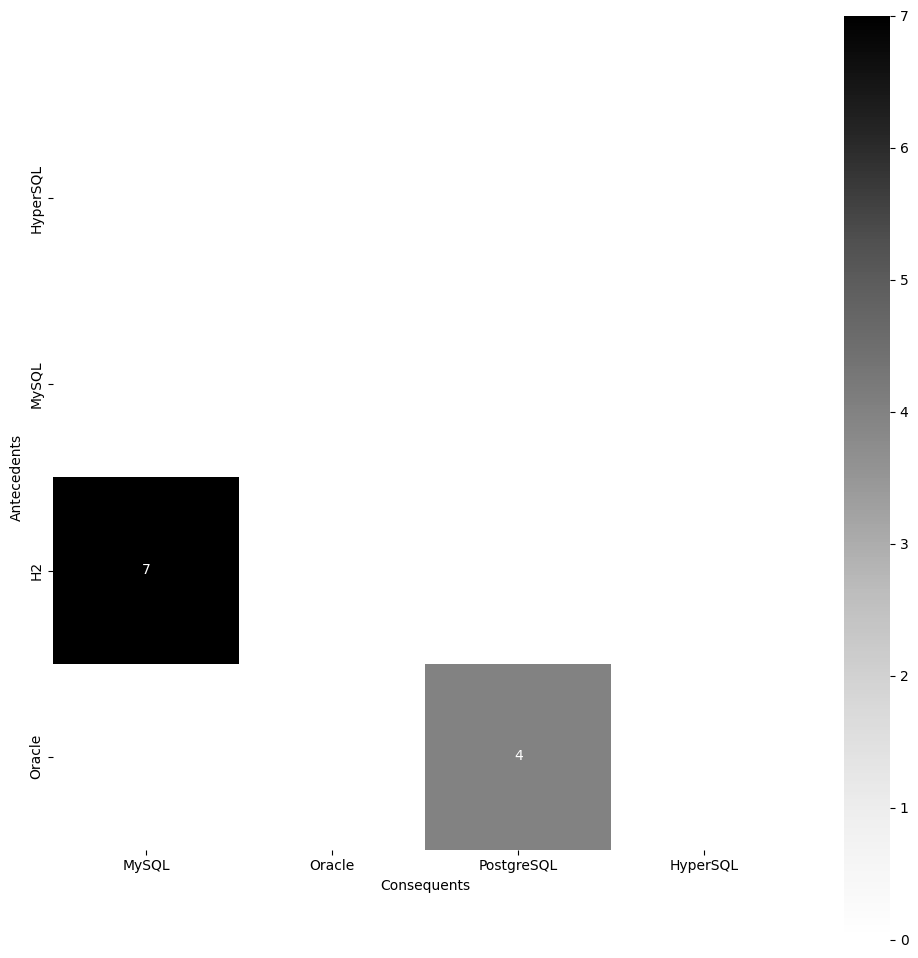

In [20]:
#Generating a heatmap without repetitions, with function ordering, following the tip:
# generate the complete heatmap with the y axis inverted and
# use the parameter mask=np.triu(np.ones_like(df)) in sns.heatmap
import seaborn as sns
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True), 
    mask=np.triu(np.ones_like(pivot)), square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig12.pdf", format="pdf", bbox_inches="tight")


In [21]:
#Test showing the rules without repetitions and with dataframe ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the first version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [22]:
#Test by ordering only through support, after dataframe ordering
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,HyperSQL,MySQL,0.069231,13.638462,0.120513,23.741026,0.046154,9,0.666667,5.531915,0.037811,2.638462,1.0,1.0
1,MySQL,PostgreSQL,0.120513,23.741026,0.046154,9.092308,0.041026,8,0.340426,7.375887,0.035464,1.446154,1.0,1.0
2,H2,MySQL,0.066667,13.133333,0.120513,23.741026,0.035897,7,0.538462,4.468085,0.027863,1.905556,1.0,1.0
3,MySQL,Oracle,0.120513,23.741026,0.038462,7.576923,0.030769,6,0.255319,6.638298,0.026134,1.291209,1.0,1.0
4,H2,HyperSQL,0.066667,13.133333,0.069231,13.638462,0.028205,5,0.423077,6.111111,0.023590,1.613333,1.0,1.0
5,HyperSQL,Oracle,0.069231,13.638462,0.038462,7.576923,0.023077,4,0.333333,8.666667,0.020414,1.442308,1.0,1.0
6,HyperSQL,PostgreSQL,0.069231,13.638462,0.046154,9.092308,0.023077,4,0.333333,7.222222,0.019882,1.430769,1.0,1.0
7,Oracle,PostgreSQL,0.038462,7.576923,0.046154,9.092308,0.023077,4,0.600000,13.000000,0.021302,2.384615,1.0,1.0


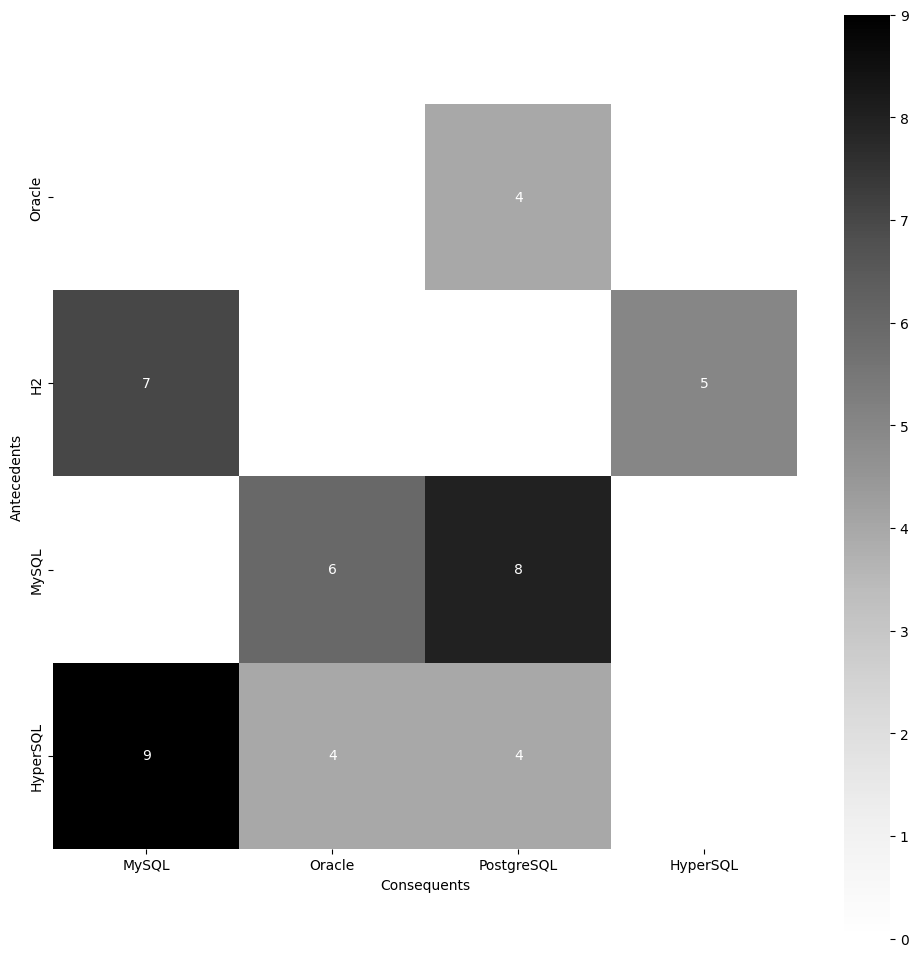

In [24]:
# Heatmap graph generated with all rules and dataframe ordering
# The suggestion for this chart would be to show all rules without filtering by support
import seaborn as sns
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True,  vmin=0,  cmap=sns.color_palette("Greys", as_cmap=True), annot=True, square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)

In [25]:
#Test by ordering only through support, after dataframe ordering
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,HyperSQL,MySQL,0.069231,13.638462,0.120513,23.741026,0.046154,9,0.666667,5.531915,0.037811,2.638462,1.0,1.0
1,MySQL,PostgreSQL,0.120513,23.741026,0.046154,9.092308,0.041026,8,0.340426,7.375887,0.035464,1.446154,1.0,1.0
2,H2,MySQL,0.066667,13.133333,0.120513,23.741026,0.035897,7,0.538462,4.468085,0.027863,1.905556,1.0,1.0
3,MySQL,Oracle,0.120513,23.741026,0.038462,7.576923,0.030769,6,0.255319,6.638298,0.026134,1.291209,1.0,1.0
4,H2,HyperSQL,0.066667,13.133333,0.069231,13.638462,0.028205,5,0.423077,6.111111,0.023590,1.613333,1.0,1.0
5,HyperSQL,Oracle,0.069231,13.638462,0.038462,7.576923,0.023077,4,0.333333,8.666667,0.020414,1.442308,1.0,1.0
6,HyperSQL,PostgreSQL,0.069231,13.638462,0.046154,9.092308,0.023077,4,0.333333,7.222222,0.019882,1.430769,1.0,1.0
7,Oracle,PostgreSQL,0.038462,7.576923,0.046154,9.092308,0.023077,4,0.600000,13.000000,0.021302,2.384615,1.0,1.0


PostgreSQL and MySQL being used concurrently in 27 projects, Oracle with PostgreSQL appears in 17 projects, H2 with Oracle in 12 projects, SQLite with H2 in 6 projects, Ehcache with MySQL in 10 projects, Sap Adaptive Server with IBM DB2 in 5 projects, MS SQL Server with SQlite in 5 projects, MongoDB with MySQL in 6 projects, among other combinations.

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [26]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
5,PostgreSQL,MySQL,0.046154,9.092308,0.120513,23.741026,0.041026,8.082051,0.888889,7.375887,0.035464,7.915385,1,1
9,Oracle,MySQL,0.038462,7.576923,0.120513,23.741026,0.030769,6.061538,0.800000,6.638298,0.026134,4.397436,1,1


In [27]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,Oracle,0.046154,9.092308,0.038462,7.576923,0.023077,4.546154,0.500000,13.000000,0.021302,1.923077,1,1
1,Oracle,PostgreSQL,0.038462,7.576923,0.046154,9.092308,0.023077,4.546154,0.600000,13.000000,0.021302,2.384615,1,1
4,MySQL,PostgreSQL,0.120513,23.741026,0.046154,9.092308,0.041026,8.082051,0.340426,7.375887,0.035464,1.446154,1,1
5,PostgreSQL,MySQL,0.046154,9.092308,0.120513,23.741026,0.041026,8.082051,0.888889,7.375887,0.035464,7.915385,1,1
6,PostgreSQL,HyperSQL,0.046154,9.092308,0.069231,13.638462,0.023077,4.546154,0.500000,7.222222,0.019882,1.861538,1,1
7,HyperSQL,PostgreSQL,0.069231,13.638462,0.046154,9.092308,0.023077,4.546154,0.333333,7.222222,0.019882,1.430769,1,1


In [28]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [29]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [30]:
rules6 = df[ (df['consequents'].str.contains('SQLite'))]# & (df['confidence'] > 0.3) ] # 0.7
rules6

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [31]:
rules7 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [32]:
#rules7 = df[ (df['consequents'].str.contains('Redis'))] #& (df['confidence'] > 0.7) ]
rules8 = df[ (df['consequents'].str.contains('IBM DB2'))] #& (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [33]:
#rules9 = df[(df['consequents'].str.contains('MongoDB'))]#& (df['confidence'] > 0.3) ] # 0.7
rules9 = df[ (df['consequents'].str.contains('MS SQL Server'))]# & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [34]:
rules10 = df[ (df['antecedents'].str.contains('SAP Adaptive Server')) | (df['consequents'].str.contains('SAP Adaptive Server'))]# & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [35]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB'))]# & (df['confidence'] > 0.7) ]
rules11 = df[ (df['consequents'] .str.contains('MS Access'))]# & (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [36]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB'))]# & (df['confidence'] > 0.7) ]
rules12 = df[ (df['consequents'] .str.contains('MongoDB'))]# & (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.
In first version not occurr expected patterns

In [37]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [38]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
#rules10 = df2[(df2['consequents'].str.contains('PostGIS'))] Este BD nã retornou nas regras
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [39]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [40]:
rules12 = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [41]:
rules13 = df2[(df2['lift'] > 4.5)] #>20
rules13 = rules13.sort_values(['lift'], ascending=False)
rules13

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,Oracle,0.046154,9.092308,0.038462,7.576923,0.023077,4.546154,0.500000,13.000000,0.021302,1.923077,1,1
1,Oracle,PostgreSQL,0.038462,7.576923,0.046154,9.092308,0.023077,4.546154,0.600000,13.000000,0.021302,2.384615,1,1
2,Oracle,HyperSQL,0.038462,7.576923,0.069231,13.638462,0.023077,4.546154,0.600000,8.666667,0.020414,2.326923,1,1
3,HyperSQL,Oracle,0.069231,13.638462,0.038462,7.576923,0.023077,4.546154,0.333333,8.666667,0.020414,1.442308,1,1
4,MySQL,PostgreSQL,0.120513,23.741026,0.046154,9.092308,0.041026,8.082051,0.340426,7.375887,0.035464,1.446154,1,1
5,PostgreSQL,MySQL,0.046154,9.092308,0.120513,23.741026,0.041026,8.082051,0.888889,7.375887,0.035464,7.915385,1,1
6,PostgreSQL,HyperSQL,0.046154,9.092308,0.069231,13.638462,0.023077,4.546154,0.500000,7.222222,0.019882,1.861538,1,1
7,HyperSQL,PostgreSQL,0.069231,13.638462,0.046154,9.092308,0.023077,4.546154,0.333333,7.222222,0.019882,1.430769,1,1
8,MySQL,Oracle,0.120513,23.741026,0.038462,7.576923,0.030769,6.061538,0.255319,6.638298,0.026134,1.291209,1,1
9,Oracle,MySQL,0.038462,7.576923,0.120513,23.741026,0.030769,6.061538,0.800000,6.638298,0.026134,4.397436,1,1


In [90]:
#rules13_filter = rules13.to_excel('rules_filters_liftv1.xlsx', index=False)

In [42]:
rules14 = df2[(df2['confidence'] > 0.1)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,Oracle,0.046154,9.092308,0.038462,7.576923,0.023077,4.546154,0.500000,13.000000,0.021302,1.923077,1,1
1,Oracle,PostgreSQL,0.038462,7.576923,0.046154,9.092308,0.023077,4.546154,0.600000,13.000000,0.021302,2.384615,1,1
2,Oracle,HyperSQL,0.038462,7.576923,0.069231,13.638462,0.023077,4.546154,0.600000,8.666667,0.020414,2.326923,1,1
3,HyperSQL,Oracle,0.069231,13.638462,0.038462,7.576923,0.023077,4.546154,0.333333,8.666667,0.020414,1.442308,1,1
4,MySQL,PostgreSQL,0.120513,23.741026,0.046154,9.092308,0.041026,8.082051,0.340426,7.375887,0.035464,1.446154,1,1
5,PostgreSQL,MySQL,0.046154,9.092308,0.120513,23.741026,0.041026,8.082051,0.888889,7.375887,0.035464,7.915385,1,1
6,PostgreSQL,HyperSQL,0.046154,9.092308,0.069231,13.638462,0.023077,4.546154,0.500000,7.222222,0.019882,1.861538,1,1
7,HyperSQL,PostgreSQL,0.069231,13.638462,0.046154,9.092308,0.023077,4.546154,0.333333,7.222222,0.019882,1.430769,1,1
8,MySQL,Oracle,0.120513,23.741026,0.038462,7.576923,0.030769,6.061538,0.255319,6.638298,0.026134,1.291209,1,1
9,Oracle,MySQL,0.038462,7.576923,0.120513,23.741026,0.030769,6.061538,0.800000,6.638298,0.026134,4.397436,1,1


In [43]:
#if you need to generate the rules in excel
rules_filter = df2.to_excel('historical_filters.xlsx', index=False)